# 2-5 あれもこれも実は"グラフ"

## グラフとは

頂点(vertex, node)と辺(edge)からなる。
- 頂点: 対象を表す。図では点や辺で描かれる
- 辺: 対象同士の結びつきをあらわす。図では2点を結ぶ線分で描かれる。向き、重みなど属性がつくこともある。

## グラフの種類

- 無向グラフ
    - パス
    - 閉路
    - 連結 
    - 連結でない
    - 連結していて、閉路がない: 木
    - 連結でなく、閉路がない: 森 (木が複数ある)
- 有向グラフ
    - 閉路を持たない: DAG(Directed Acyclic Graph)
    - トポロジカル順序:

## グラフの表現

- 隣接行列
    - 頂点iとjの関係を2次元行列で表現
    - 2頂点間に辺がないかあるかを0, 1で表す
    - 有向の場合は、i,jは1. j,iは0となどとする
    - 重み付きの場合は、重み0の場合を考慮して、初期値はINFなどで工夫する
    - メモリが必ず$V^2$必要
    - 多重辺や自己ループの扱いは注意が必要
- 隣接リスト
    - 各頂点からどの頂点に向かって辺が伸びているかをリストで表現


In [ ]:
# 

def main():
    

## 2部グラフ判定(グラフの彩色問題)

頂点数nの無向グラフが与えられている。隣接している頂点同士が違う色になるよう、頂点に色を塗る。

2色以内で全ての頂点を塗ることができるか判定してください。

多重辺やループはないものとする。

制約

$1 \leqq n \leqq 1000$

隣接している頂点同士が違う色になるように彩色する問題をグラフの彩色問題と言います。

グラフを彩色するのに必要な最小の色数をグラフの彩色数といいます。

彩色数が2であるグラフを二部グラフと言います。

2色で塗る場合、1つの頂点の色を決めれば隣接する頂点の色も一意的に決まる。したがって適当な頂点から始めて隣接する頂点を決めていけば、2色で塗れるかが判定できる。

これは深さ優先探索を用いることで簡単に書くことができる。

<img src="images/2-5/2022-10-12-21-10-17.png" width="400">

もしグラフが連結なら1回のdfsで全ての頂点を見ることができるが、問題文で指定がない場合は連結でないことがあるので、頂点を順次見ていく必要がある。

連結かどうかの判定や木かどうかの判定もdfsを少し変えるだけで書ける。

dfsを利用して、トポロジカル順序を求めることも可能。

今回は全ての頂点と辺をちょうど一度ずつ見ているので、計算量は$O(|V|+|E|)$


In [3]:
# 例1 入力
V = 3
G = [
    [1, 2],
    [0, 2],
    [0, 1],
]

# 例2 入力
"""
V = 4
G = [
    [1, 3],
    [0, 2],
    [1, 3],
    [2, 2],
]
"""

color = [0] * V

# 色の割り振り追跡用のリスト
c1, c2 = INF, INF


def dfs(v, c):
    """
    頂点vをcで塗り, 隣接頂点を調べる
    同じ色ならFalse, 塗られていないなら-cで塗る
    途中Falseを出さずに連結頂点を全て塗れたらTrue
    """
    # 頂点vをcで塗る
    color[v] = c

    # 色の割り振り追跡リスト
    c1.append(v) if c == 1 else c2.append(v)

    for vi in G[v]:
        if color[vi] == c:
            return False
        if color[vi] == 0 and not dfs(vi, -c):
            return False
    return True


# 各頂点に対し，塗られていないならdfsを実行する．
# dfsで連結頂点は塗られるので，次のdfsは非連結の頂点
# →塗られていない頂点は好きな色(ここでは1)で塗れば良い
def solve():
    for i in range(V):
        if color[i] == 0:
            # まだ頂点iに色が塗られていない場合
            if dfs(i, 1) is False:  # 1で塗る
                # その結果隣接の頂点で同じ色だった場合。
                print("No")
                return
    print("Yes")
    return


solve()
print(f"色1:{c1}, 色2:{c2}")

No
Yes (色1:[0, 2], 色2:[1])


## 最短経路問題

最短路問題はグラフの最も基本的な問題で、プログラミングコンテストでも頻繁に出題される。

最短路とは2頂点が与えられたときに、その頂点を始点・終点とするようなパスのうちで、通る辺のコストの和を最小にするもののこと。

コストを距離として、最短距離を考えるとわかりやすい。

パズルを解く最小手数を求めることなども、一種の最短路問題と言える。

### 単一始点最短経路問題(ベルマンフォード法)

始点を固定した時に、他の全ての頂点との間の最短形を求める問題。

さらに終点を固定したものを2頂点最短経路問題という。

両者は同じ計算量なので、単一始点最短形を問題を解くことにする。

> 始点$s$から頂点への最短距離を$d[i]$と定義すると、次のような等式が成り立つ。
> 
> $d[i] = min\{d[j] + (jからiへの辺のコストe) | e = (j, i) ∈ E\}$
> 
> もしグラフがDAG(閉路がない)であれば、頂点を順序付けることができるので、この漸化式を用いてdを計算することが可能だが、グラフに閉路が含まれる場合は順に計算していくことはできない。
> 
> その場合でも、頂点への仮の最短距離を$d[i]$とし、初期値$d[s] = 0$、$d[i] = INF$(十分大きな定数)として、この式を繰り返し適用してdを更新していくことでdを計算することができる。
> 
> 負の閉路が存在しなければこの更新はいつかは停止し、そのときのdは最短距離となっている。
>
> 負の閉路がある場合は、最短距離dは更新のたびに小さくなってくので止まらない。

このアルゴリズムをベルマンフォード法という。

[例題1](https://kuruton.hatenablog.com/entry/2020/11/23/080000)

<img src="images/2-5/2022-10-12-21-55-10.png" width="400">

In [5]:
V, E = 7, 20
es = [  # [頂点1, 頂点2, コスト]
    [0, 1, 2],
    [1, 0, 2],
    [0, 2, 5],
    [2, 0, 5],
    [1, 2, 4],
    [2, 1, 4],
    [1, 3, 6],
    [3, 1, 6],
    [1, 4, 10],
    [4, 1, 10],
    [2, 3, 2],
    [3, 2, 2],
    [3, 5, 1],
    [5, 3, 1],
    [4, 5, 3],
    [5, 4, 3],
    [4, 6, 5],
    [6, 4, 5],
    [5, 6, 9],
    [6, 5, 9],
]

# s番目の頂点から各頂点への最短経路を求める
def shortest_path(s: int):
    INF = float("inf")
    d = [INF] * V  # 最短距離更新用のリスト
    d[s] = 0
    while True:
        update = False
        for e in es:
            if d[e[0]] != INF and d[e[1]] > d[e[0]] + e[2]:
                d[e[1]] = d[e[0]] + e[2]
                update = True
        if not update:
            break
    print(d)


shortest_path(0)  # 頂点0を始点とする

[0, 2, 5, 7, 11, 8, 16]


この方法では、グラフに始点sから到達可能な負のコストの閉路が存在しなければ、最短路は同じ頂点を通らない。

つまり最短路では高々|V| - 1個の辺しか通らないので、whileループも高々|V| - 1しか実行されないことがわかる。

したがって計算量は$O(|V| * |E|)$となる。

逆にsから到達可能なふの閉路がある場合は、|V|回目のループでも更新が発生するので、負の閉路の検出が可能。

全てのiについて、d[i]=0と初期化すれば全ての負の経路の検出を行える。

[例題2](https://kuruton.hatenablog.com/entry/2020/11/23/080000)

有向グラフかつ、負の閉路がある場合

<img src="images/2-5/2022-10-15-12-26-58.png" width="400">

In [6]:
INF = float("inf")

V, E = 6, 7  # Vは頂点数、Eは辺数

# [頂点1から, 頂点2への, コスト]
es = [
    [0, 1, 2],
    [0, 3, 4],
    [1, 2, 3],
    [2, 3, 5],
    [2, 5, 2],
    [4, 2, -4],
    [5, 4, 1],
]

# trueなら負の閉路が存在する
def find_negative_loop():
    d = [0] * V

    for i in range(V):
        for e in es:
            vf = e[0]  # from
            vt = e[1]  # to
            vf_to_vt_cost = e[2]
            # 現時点のv2までの最小コストより、現時点のまでの最小コスト + v1-v2コストの方が小さい場合は更新する
            if d[vt] > d[vf] + vf_to_vt_cost:
                d[vt] = d[vf] + vf_to_vt_cost

                # n回目にも更新があるなら負の経路が存在する
                if i == V - 1:
                    return True
    return False


find_negative_loop()

True

In [7]:
# おまけ: 最短経路を求め、その始点sから終点iまでで到達できる負の閉路がある場合は検出する(d[i]=-infとする)

# 例題1
"""
V, E = 7, 20
es = [  # [頂点1, 頂点2, コスト]
    [0, 1, 2],
    [1, 0, 2],
    [0, 2, 5],
    [2, 0, 5],
    [1, 2, 4],
    [2, 1, 4],
    [1, 3, 6],
    [3, 1, 6],
    [1, 4, 10],
    [4, 1, 10],
    [2, 3, 2],
    [3, 2, 2],
    [3, 5, 1],
    [5, 3, 1],
    [4, 5, 3],
    [5, 4, 3],
    [4, 6, 5],
    [6, 4, 5],
    [5, 6, 9],
    [6, 5 ,9],
]
"""
# 例題2
V, E = 6, 7  # Vは頂点数、Eは辺数

# [頂点1から, 頂点2への, コスト]
es = [
    [0, 1, 2],
    [0, 3, 4],
    [1, 2, 3],
    [2, 3, 5],
    [2, 5, 2],
    [4, 2, -4],
    [5, 4, 1],
]

INF = float("inf")


def bellmanford(s):
    d = [INF] * V
    d[s] = 0

    for i in range(V):
        for e in es:
            vf = e[0]  # from
            vt = e[1]  # to
            vf_to_vt_cost = e[2]
            if d[vt] > d[vf] + vf_to_vt_cost:
                d[vt] = d[vf] + vf_to_vt_cost

                # n回目にも更新があるなら負の経路が存在する
                if i == V - 1:
                    d[vt] = -INF
                    while True:
                        update = False
                        for i in range(len(es)):
                            e = es[i]
                            if d[e[1]] != -INF and d[e[0]] == -INF:
                                d[e[1]] = -INF
                                update = True
                        if not update:
                            break
    return d


D = bellmanford(0)  # 頂点0を始点とする

print(D)

[0, 2, -inf, -inf, -inf, -inf]


### 単一始点最短路問題(ダイクストラ法)

[解説のyoutube](https://www.youtube.com/watch?v=X1AsMlJdiok)

負の辺がない場合を考える。

ベルマンフォード法で計算中の、ある時点でのd[i]が最短距離でない場合、d[i] + (i⇨jの辺のコスト) = d[j]と更新が可能な場合でもd[j]は最短経路にはならない
⇨ つまり、まずd[i]の最短距離を確定させてから、そこからつながっているjのd[j]を計算するべき

また、d[j]が変化していない場合でも、頂点iからでている辺を毎回使っていることになる。

この無駄な計算を省くために、以下のようにアルゴリズムを修正する。

1.  最短距離が確定した頂点と隣接している頂点を更新する
2.  1で使った「最短距離が確定した頂点」はもう使わない

最短距離が確定した頂点をどのように見つけるかが問題となる。

- 初期状態では始点sのみ最短距離が0で確定している
- まだ使われていない頂点iのうち、距離d[i]が最小の頂点は最短距離が確定している

(最短距離が未確定の頂点の中で最も小さい距離を持つ頂点iは、まだ検討していないルートを使って到達しても、他の未確定頂点(頂点iより距離が大きい)を必ず通ることになり最短距離が更新されることはないため、確定して良い)

よって、以下のようなアルゴリズムになる
1. 始点を初期化: 最短距離(最小コスト)が0とする。他の各頂点の初期値は無限大(inf)とする
2. 以下をループ
3. 最短距離(コスト)が未確定の頂点の中で、始点からの距離が最小である頂点は最短距離が確定となる
4. その最短距離が確定した頂点から繋がっている最短距離未確定の頂点への距離(コスト)を計算し、暫定値より小さくなれば更新する
5. 全ての頂点の最短距離が確定すれば終了。そうでなければ3に戻る

これは負の辺がないので、d[i]が後でより小さくなることがないから。

このアルゴリズムをダイクストラ(Dijkstra)法という。


In [18]:
V = 7
INF = float("inf")

def dijkstra(s: int):
    # パラメータを初期化
    cost: list[list[int | float]] = [
        [  0,   2,   5, INF, INF, INF, INF],
        [  2,   0,   4,   6,  10, INF, INF],
        [  5,   4,   0,   2, INF, INF, INF],
        [INF,   6,   2,   0, INF,   1, INF],
        [INF,  10, INF, INF,   0,   3,   5],
        [INF, INF, INF,   1,   3,   0,   9],
        [INF, INF, INF, INF,   5,   9,   0],
    ]
    d: list[int | float] = [INF] * V
    is_used: list[bool] = [False] * V
    d[s] = 0  # 始点を0で初期化

    while True:
        # 点vまでの最短距離を探索。まずは-1で初期化
        v = -1
        # 3. まだ使われていない頂点のうち、距離が最小のものを探してvに代入
        for u in range(V):
            # 点uがまだ使われていないis_used[u] is Falseかつ、
            # ・vが初期値 -1 (ループの1回目)
            # ・始点から任意の点uまでのコストd[u]が、暫定の最小コスト[v]より小さい
            # のどちらかの場合は v = uで更新する
            if (is_used[u] is False) and (v == -1 or (d[u] < d[v]))
                v = u
                
        # 5. 全ての頂点が確定していて(is_usedの要素が全てTrue)、未確定の点がない場合はv = -1のままなので終了
        if v == -1:
            break
        # 3. そうでない場合は、forで見つけたコスト最小の頂点を確定させる
        is_used[v] = True
        # 4. 新たに確定した点vから繋がる点uのコストをd[v] + cost[v][w]計算する(現在のd[w]より小さければ更新)
        for u in range(V):
            d[u] = min(d[u], d[v] + cost[v][u])

    print(d)


dijkstra(0)

このように隣接行列を使用したダイクストラ法の実装は計算量$O(|V|^2)$

隣接リストを用いたばいは最短距離の更新に要する計算量は$O(|E|)$ですむが、次に使う未確定の頂点をループを回して探していたのでは結局同じ$O(|V|^2)$

$|E|$が小さい場合は、一番時間のかかる処理は、この未確定の頂点を探す部分(手順の3)なので、これを適切なデータ構造を使って高速化する。

高速化したいのは、距離の挿入(更新)と最短距離の取り出しの2か所。これは2-4でやったヒープを使えばよさそうとわかる。

各頂点の仮の最短距離をヒープで管理しておき、
- 最短距離の更新が起きたら、ヒープ性が保たれるようにその要素を根方向へ移動する。
- 最小値をヒープの根から取り出すとこれが次に使う頂点になる。

こうすると、要素数は$O(|V|)$、更新と取り出しの回数は$O(|E|)$となり、全体の計算量は$O(|E|log|V|)$となる。

ダイクストラ法はベルマンフォード法より計算量が少ないが、負の辺に対応できないためその場合はベルマンフォード法を用いる必要がある。

In [5]:
# 優先度付きキューをインポートする
import heapq

INF = float("inf")

V = 7


def dijkstra(s):
    # パラメータを初期化
    # Gは1次元目の要素番号が頂点の番号、2次元目のタプルは(繋がっている頂点, 辺のコスト)
    G: list[list[tuple[int, int]]] = [
        [(0, 0), (1, 2),(2, 5)],
        [(0, 2), (1, 0), (2, 4), (3, 6), (4, 10)],
        [(0, 5), (1, 4), (2, 0), (3, 2)],
        [(1, 6), (2, 2), (3, 0), (5, 1)],
        [(1, 10), (4, 0), (5, 3), (6, 5)],
        [(3, 1), (4, 3), (5, 0), (6, 9)],
        [(4, 5), (5, 9), (6, 0)],
    ]
    d: list[int | float] = [INF] * V
    d[s] = 0
    # 最短距離を管理するためのヒープ用のリストを作成し、始点のP=(0, s)を格納
    # 原文のC++では(最短距離, 頂点の番号)のpairを追加しているが、
    # pythonでは替わりに、タプルを使用する(2要素目の頂点の番号でラベル付けできる)
    que = []
    heapq.heappush(que, (d[s], s))

    while len(que) != 0:  # 全ての頂点が確定する=ヒープから値がなくなるまでループ
        p = heapq.heappop(que)  # ヒープから距離が最短の地点の情報を取り出す

        v = p[1]
        # 各地点の最短距離が更新されても古い値が残るが、
        # 古い値が取り出された場合、最短距離d[v]より大きいのでスキップされる。
        if d[v] < p[0]:
            continue
        for i in range(len(G[v])):  # len(G[v])=頂点vから伸びる辺の数だけループ(計算量O(|E|))
            u, v_to_u_cost = G[v][i]  # (辺が繋がる頂点uと、 辺のコスト)を取り出す
            if d[u] > d[v] + v_to_u_cost:  # 頂点uまでの最短距離が更新できる場合
                d[u] = d[v] + v_to_u_cost  # 更新
                heapq.heappush(que, (d[u], u))  # ヒープに現時点の最短距離を追加
    print(d)

dijkstra(0)  # 頂点0を始点とする

[0, 2, 5, 7, 11, 8, 16]


### 全点対最短絡路問題(ワーシャル-フロイド法)

全ての2頂点間の最短路を求める問題を全点対最短経路問題という。

これはDPの考え方で求めることができ、このアルゴリズムをワーシャル-フロイド(Warshall-Floyd)法という。

アルゴリズムの説明は[この動画](https://www.youtube.com/watch?v=qUICO9qz5E8)がわかりやすい。
- 頂点の番号を0~kとする。
- 頂点iからjまでの最短距離を表す行列d[k+1]を作る。まず、k=-1つまりd[0]として、各頂点間のコストの行列をスタートとする(辺がない箇所はinf)。
- kを-1から順番に見ていき、頂点kを経由した時のi-j間距離の距離を求める。これは、i-k間の距離 + k-j間の距離で求められる。これが今までの最短距離であれば行列を更新する。
    - $d[k+1][i][j] = min(d[k][i][j], d[k][i][k] + d[k][k][j])$

この方法だと計算量$0(|V|^3)$となる

例題は[このページを参照](https://kuruton.hatenablog.com/entry/2020/11/29/080000)

- 入力例1

<img src="images/2-5/2022-10-18-07-53-32.png" width="400">

- 入力例2 負の閉路をもつ有向グラフ

<img src="images/2-5/2022-10-18-07-54-46.png" width="400">


In [4]:
from pprint import pprint
INF = float("inf")
# 入力例1
V, E = 7, 20    # Vは頂点数、Eは辺数

d = [
    [0,     2,   5, INF, INF, INF, INF],
    [2,     0,   4,   6,  10, INF, INF],
    [5,     4,   0,   2, INF, INF, INF],
    [INF,   6,   2,   0, INF,   1, INF],
    [INF,  10, INF, INF,   0,   3,   5],
    [INF, INF, INF,   1,   3,   0,   9],
    [INF, INF, INF, INF,   5,   9,   0],
]    # d[u][v]は辺e=(u,v)のコスト(存在しない場合はINF、ただしd[i][i]=0とする)

""" # 入力例2
V, E = 6, 7    # Vは頂点数、Eは辺数
d = [
    [  0,   2, INF,   4, INF, INF],
    [INF,   0,   3, INF, INF, INF],
    [INF, INF,   0,   5, INF,   2],
    [INF, INF, INF,   0, INF, INF],
    [INF, INF,  -4, INF,   0, INF],
    [INF, INF, INF, INF,   1,   0],
]    # d[u][v]は辺e=(u,v)のコスト(存在しない場合はINF、ただしd[i][i]=0とする) """


def warshall_floyd():
    for k in range(V):
        for i in range(V):
            for j in range(V):
                d[i][j] = min(d[i][j], d[i][k] + d[k][j])
    pprint(d)

warshall_floyd()



[[0, 2, 5, 7, 11, 8, 16],
 [2, 0, 4, 6, 10, 7, 15],
 [5, 4, 0, 2, 6, 3, 11],
 [7, 6, 2, 0, 4, 1, 9],
 [11, 10, 6, 4, 0, 3, 5],
 [8, 7, 3, 1, 3, 0, 8],
 [16, 15, 11, 9, 5, 8, 0]]


### 経路復元

ここまでは最短路の距離を求めてきたが、最短路の経路を出力用させる問題もある。

ダイクストラ法を例にして、最短路の経路を求めてみる。

頂点jまでの最短距離がわかった後、d[j] = d[k] + cost[k][j]となる頂点kは、最短路におけるjへの経路のjの直前に通る頂点なるので、これを繰り返すことで最短路の経路を復元できる。

この時計算量は$0|E|$となる。

また、最短路を探索する時にjの直前の頂点をprev[j]として記憶しておくことで$0|V|$で最短路を復元することも可能。

d[j] = d[k]+cost[k][j]で更新されたときに、prev[j]=kとする

In [ ]:
INF = float('inf')

prev = []

V, E = map(int,input().split())    # Vは頂点数、Eは辺数
cost = [[INF] * V for _ in range(V)]    # cost[u][v]は辺e=(u,v)のコスト(存在しない場所はINF)
for _ in range(E):
    s, t, c = map(int,input().split())
    cost[s][t] = c
    cost[t][s] = c


d = [INF for _ in range(V)]    # 最短距離
used = [False] * V    # すでに使われたかのフラグ
prev = [-1] * V    # 最短路の直前の頂点

# 始点sから各頂点への最短距離を求める
def dijkstra(s):
    d[s] = 0
    
    while True:
        v = -1
        for u in range(V):
            if not used[u] and (v == -1 or d[u] < d[v]):
                v = u
        
        if v == -1:
            break
        used[v] = True
        
        for u in range(V):
            if d[u] > d[v] + cost[v][u]:
                d[u] = d[v] + cost[v][u]
                prev[u] = v

# 頂点tへの最短路
def get_path(t):
    path = []
    while t != -1:
        path.append(t)    # tがsになるまでprev[t]を辿っていく
        t = prev[t]
    # このままだとt->sの順になっているので逆順にする
    path.reverse()
    return path

dijkstra(0)    # 頂点0を始点とする

path = get_path(6)    # 頂点0から頂点6への最短経路

print(path)

## 最小全域木

無向グラフが与えられたときに、 その部分グラフで任意の2頂点を連結にするような木を全域木(Spanning Tree)という。

つまりすべての頂点が辺で結ばれているような木のこと。

このとき、使われている辺のコストの合計が最小になsるように辺を選んだ全域木を最小全域木という(MST: MInimum Spanning Tree)

最小全域木を求めるアルゴリズムとして、クラスカル(Kruskal)法とプリム(Prim)法がある

ちなみに、全域木であることと連結であることは同値

### 最小全域木問題1(プリム法)

プリム法はダイクストラ法と似ており、ある頂点から始めて、少しづつ辺を追加していく方法。

任意の頂点vを選び、そこから貪欲的に他の頂点を結ぶ最小コストの辺を選んでいく。こうやって全域木を構成していくと最小全域木になる。

具体的な手順
1. 適当な頂点を選び確定させる
2. 確定した頂点から未確定の頂点に伸びている辺全てから、最小コストの辺を選び、その先の未確定の頂点を確定させる
3. ２を繰り返しすべての頂点が確定したら終了

[例題](https://kuruton.hatenablog.com/entry/2020/12/05/080000)

<img src="images/2-5/2022-10-21-15-54-16.png" width="400">

In [10]:
# 優先度付きキューをインポートする
import heapq

INF = float('inf')

V, E = 7, 9
# 隣接リスト
cost = [
    [(0, 0), (1, 2), (4, 10)],
    [(0, 2), (1, 0), (2, 1), (3, 3), (5, 7)],
    [(1, 1), (2, 0)],
    [(1, 3), (3, 0), (5, 1), (6, 5)],
    [(0, 10), (4, 0), (5, 5)],
    [(1, 7), (3, 1), (4, 5), (5, 0), (6, 8)],
    [(3, 5), (5, 8), (6, 0)],
]    # cost[u][v]は辺e=(u,v)のコスト(存在しない場所はINF)

def prim_heap(s):
    min_edge_list = []
    res = 0
    used = [False] * V    # 頂点iがXに含まれているか(確定)
    
    # まず(辺のコスト, 頂点sからつながる頂点)のリストをヒープ化する
    que = []
    for v_c_tuple in cost[s]:
        heapq.heappush(que, (v_c_tuple[1], v_c_tuple[0]))

    while len(que) != 0:  # 全ての頂点が確定する=ヒープから値がなくなるまでループ
        p = heapq.heappop(que)  # ヒープから最小の辺コストのものを取り出す
        v = p[1]
        if used[v]:  # ヒープ追加後に確定した頂点の情報は無視
            continue
        used[v] = True  # 頂点vを確定
        # 解答の出力用
        min_edge_list.append(p)
        res += p[0]

        # len(cost[v])=頂点vから伸びる辺の数だけループ(計算量O(|E|))
        for i in range(len(cost[v])):
            u, v_to_u_cost = cost[v][i]  # (辺が繋がる頂点uと、 辺のコスト)を取り出す
            if not used[u]:
                # vからつながる確定していない頂点uまでの(コスト, 頂点番号)をヒープに追加
                # 計算量 O(logN)
                heapq.heappush(que, (v_to_u_cost, u))
    print(min_edge_list)
    print(res)
    return

prim_heap(0)  # 任意の頂点s=0から始める

[(0, 0), (2, 1), (1, 2), (3, 3), (1, 5), (5, 4), (5, 6)]
17


### 最小全域木問題2(クラスカル法)

クラスカル(Kruskal)法は辺をコストの小さい順に見ていき、閉路ができなければ追加するという手順のアルゴリズム。

なので、閉路ができるかどうかの判定が重要。

頂点uとvを結ぶ辺eを追加しようとしていると仮定する。ここで、追加前にuとvが同じ連結成分に属していなければ、eを追加しても閉路はできない。

逆に同じ連結成分に属していれば必ず閉路ができるといえる。

同じ連結成分かどうかはUnionFind木かを使うことで効率的に判定できる。

クラスカル法は辺をソートする部分に一番時間がかかり、計算量は$O(|E|log|V|)かかる。

[例題](https://kuruton.hatenablog.com/entry/2020/12/08/000000)

<img src="images/2-5/2022-10-23-08-08-34.png" width="400">

In [13]:
# 例題の参照ページでは自分でUnion-Find木の構造を作成しているが、
# 今回はpythonのライブラリ、networkxを使用する
from networkx.utils import UnionFind

V, E = 7, 9

# (頂点u, 頂点v, v)のリスト
es = [
    (0, 1, 2),
    (0, 4, 10), 
    (1, 2, 1),
    (1, 3, 3),
    (1, 5, 7),
    (3, 5, 1),
    (3, 6, 5),
    (4, 5, 5),
    (5, 6, 8),
]

def kruskal():
    es.sort(key=lambda x: x[2])  # コストをキーにしてソート
    uf = UnionFind(range(V))  # Union-Find木の初期化
    res = 0

    for e in es:  # すべてのエッジを小さい順に取り出す
        if not uf[e[0]] == uf[e[1]]:  # エッジの頂点２つの根が同じかどうか判定
            # 同じでない場合は結合
            uf.union(e[0], e[1])
            res += e[2]
    print(res)
    return

kruskal()



17


### 応用問題: RoadBlocks (POJ No.3255)

R本の道とN個の交差点がある街があります。 道路は両方向に通行可能です。 1番の交差点からN番の交差点への二番目の最短路の長さを求めなさい。ただし、二番目の最短路とは、最短路よりも真に長いもののうちで最短のもののことを言います。 同じ道路を複数回通ってもかまいません。

制約

$1 \leqq N \leqq 5000 \\$
$1 \leqq R \leqq 100000$

<img src="images/2-5/2022-10-23-08-56-19.png" width="400">


交差点を頂点とし、道を辺とした無向グラフを考える。

最短路はダイクストラ方などを用いることで簡単に計算できるが、２番目の最短路はどのように計算するか？

ダイクストラ法を少し修正することで２番めの最短路も簡単に求めることができる。

ある頂点vへの最短路は他の頂点uへの最短路にu→vをつなげたものが、uへの２番目の最短路にu→vをつなげたものか、uへの二番目の最短路にu→vをつなげたものかのどちらかであるため、必要なのは全頂点への最短路並びに二番目の最短路のみということになる。そこで頂点について最小の距離だけでなく、二番目に小さい距離も記憶しておくことにする。あとは通常のダイクストラ法と同じようにして、この2つの距離を更新していくことで二番目の最短路を計算する事ができる。

In [14]:
# 優先度付きキューをインポートする
import heapq

INF = float("inf")

# パラメータを設定
# Gは1次元目の要素番号が頂点の番号、2次元目のタプルは(繋がっている頂点, 辺のコスト)
N, R = 4, 4
G = [
    [(0, 0), (1, 100)],
    [(0, 100), (1, 0), (2, 250), (3, 200)],
    [(1, 250), (2, 0), (3, 100)],
    [(1, 200), (2, 100), (3, 0)], 
]

dist: list[int | float] = [INF] * N
dist2: list[int | float] = [INF] * N

def solve(s):
    dist[s] = 0
    que = []
    heapq.heappush(que, (dist[s], s))

    while len(que) != 0:  # 全ての頂点が確定する=ヒープから値がなくなるまでループ
        p = heapq.heappop(que)  # ヒープから距離が最短の地点の情報を取り出す
        d = p[0]
        v = p[1]
        # 各地点の最短距離が更新されても古い値が残るが、
        # 古い値が取り出された場合、最短距離d[v]より大きいのでスキップされる。
        if dist2[v] < d:
            continue
        for i in range(len(G[v])):  # len(G[v])=頂点vから伸びる辺の数だけループ(計算量O(|E|))
            u, v_to_u_cost = G[v][i]  # (辺が繋がる頂点uと、 辺のコスト)を取り出す
            d2 = d + v_to_u_cost

            # 頂点uまでの最短距離が更新できる場合
            if dist[u] > d2:  
                dist[u], d2 = d2, dist[u]  # 最短距離で更新
                heapq.heappush(que, (dist[u], u))  # ヒープに現時点の最短距離を追加
            
            # 
            if dist2[u] > d2 and dist[u] < d2:
                dist2[u] = d2  # 直前のdist[u]は2番目の距離となるので、dst2に代入
                heapq.heappush(que, (dist2[u], u))  # ヒープに現時点の最短距離を追加
               
    print(dist2[N - 1])

solve(0)  # 頂点1を始点とする

450


### Conscription (POJ No.3723)

N人の女とM人の男を徴兵したいと思います。一人を徴兵するのには10000ドルの費用がかかりますが、すでに親しい間柄の人が徴兵されている場合、より安い費用で徴兵することが可能です。いくつかの男女の間には1〜9999の親密度が定まっており、ある人を徴兵する際の費用は、

$10000-すでに徴兵されている人のうちで最も高い親密度$

となります。このとき、適切な順番で徴兵を行うことにより、全員を徴兵するために必要な費用を最小化しなさい。ただし、同じ男女が複数通りの親密度を持つ場合もあり、その場合はその中の任意の一つの親密度を徴兵に利用できる。

制約

$1 \leqq N, M = 10000$

$O \leqq R \leqq 50000$

$0 < d < 10000$

人aを徴兵するとき、人aと人bの関係を使用した場合に、aとbを結ぶ辺を張った無向グラフを考える。

このグラフに閉路が存在したら、その閉路上の人をどのような順で徴兵しても矛盾が生じるため(?)、このグラフは森となることがわかる。逆に、森が与えられたら、対応する関係を使用するように微兵順を決めることが可能。

したがって、人を頂点とし、関係を辺とした無向グラフの最大重み森を求める(各木ごとに最大全域木を求める)ことで問題を解くことができる。
このとき辺のコストの正負を反転させると、最小全域木のアルゴリズムを用いて解くことができる。

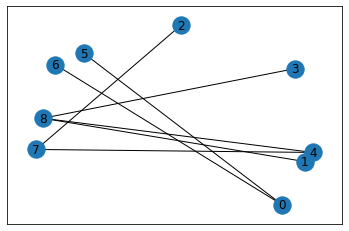

(0, 5, {'weight': -6592})
(0, 6, {'weight': -3063})
(4, 7, {'weight': -2104})
(4, 8, {'weight': -6831})
(7, 2, {'weight': -781})
(8, 1, {'weight': -2049})
(8, 3, {'weight': -4975})
{0, 1, 2, 3, 4}
{0, 1, 2, 3}
73605


In [4]:
# クラスカル法を書くのが面倒なのでnetworkxを用いる

import networkx as nx
import matplotlib.pyplot as plt

MAX_R = 50000

# 入力
N, M, R = 5, 5, 8

input = [
    # (男x, 女y, 親密度)
    (4, 3, 6831),
    (1, 3, 4583),
    (0, 0, 6592),
    (0, 1, 3063),
    (3, 3, 4975),
    (1, 3, 2049),  # 重複かつコストが大きいので今回は使わない辺
    (4, 2, 2104),
    (2, 2, 781),
]

# 使いやすいように変更
converted_data = [(male, N + female, -weight) for male, female, weight in input]
es = nx.Graph()
es.add_weighted_edges_from(converted_data)

nx.draw_networkx(es)
plt.show()

min_spanning_tree = nx.minimum_spanning_tree(es)
total_cost = 10000 * (N + M)
male_set = set()
female_set = set()

# 今回は何らかの親密度を持つ男女は徴兵数を下回るので、徴兵数に達したときの処理は不要
for i in sorted(min_spanning_tree.edges(data=True)):
    for node in i[:2]:
        if node < N:
            male_set.add(node)
        else:
            female_set.add(node - N)

    total_cost += i[2]["weight"]
    print(i)
print(male_set)
print(female_set)
print(total_cost)


### Layout (POJ No.3169)

夫ジョンはN頭の牛を飼っており、各牛には1番からN番の番号が付いています。今、牛たちは食事をもらうために番号順に一列に並んでいます。いくつかの牛は互いに仲が良く、ある距離以内に並びたいと考えており、またいくつかの牛は互いに仲が悪く、ある距離以上離れて並びたいと考えています。また、彼らはとても強引なので、複数の牛がちょうど同じ場所に並ぶことも可能です。

ML個の仲の良い牛の情報(AL,BL,DL)と、MD個の仲の悪い牛の情報(AD.BD.DD)が与えられます。ただし、それぞれ牛ALと牛BLの間の最大距離DLならびに牛ADと牛BDの間の最小距離DDを表します。この制約をすべて満たすような並び方のうち、1番の牛とN番の牛の間の最大距離を求めなさい。もし、そのような並び方が存在しない場合は-1を出力しなさい。いくらでも離れることが可能な場合は-2を出力しなさい。


制約

$2 \leqq N$ 1000$

$1 \leqq ML, MD \leqq 10000$

$1 \leqq AL < BL \leqq N$

$1 \leqq AD < BD \leqq N$

$1 \leqq DL, DD \leqq 1000000$



i番の牛の位置を$d[i]$とする。

1. 番号順に並んでいるという条件から、$d[i] \leqq d[i + 1]$
2. 仲の良い牛の間の最大距離制約から、各(AL.BL,DL)について、$d[AL]+DL \geqq d[BL]$
3. 同様に、仲の悪い牛の情報(AD、BD、DD)について、$d[AD] + DD \leqq d[BD]$

したがって、これら3種類の不等式を同時に満たすようなdにおける $d[N] - d[1]$の最大値を求める問題と解釈できる。

これは線形計画問題であるため、単体法などの複雑なアルゴリズムを用いて解くことができるが、より簡単に解くことも可能。

この制約式の特徴は、すべての式の両辺に変数が1つずつしか現れないこと。実はグラフの最短路問題もこのような形で表すことが可能。

始点sから各頂点vへの最短距離をdv)とする。

すると、コストWの辺 e=(v,u)に対して、$d(v) + w \geqq d(u)$という不等式が成り立つ。

逆に、このような不等式をすべて満たすようなdにおける$d(v)-d(s)$の最大値がsからvへの最短距離となっている。

最小値ではなく、最大値が最短距離に対応することに若干注意が必要。

さて、もとの問題と最短路問題を見比べてみまると、どちらも同じ形をしている。

つまり、もとの問題も各制約式が1つの辺に対応するようにグラフを作成することで、最短路問題として解くことができます。

まず頂点を1〜Nとします。

1. $d[i] \leqq d[i + 1]$はd[i + 1] + 0 \geqq d[i]と変形されるので、頂点i+1からiへコスト0の辺を張ることに対応
2. 同じように、$d[AL] + DL \geqq d[BL]$は頂点ALから頂点BLへコストDLの辺を張ることに対応
3. d[AD] + DD \leqq d[BD]は頂点BDから頂点ADへコスト-DDの辺を張ることに対応
4. 求めたいものはd[N]-d[1]の最大値であり、これは頂点1から頂点Nへの最短距離

グラフに負の辺が含まれるため、ダイクストラ法ではなくベルマンフォード法を用いる必要がありますが、それでも計算量は$O(N(N+ML+MD))$と
なり、この方法で時間内に解を出すことができる。

In [6]:
import sys

MAX_N = 1000
MAX_ML = 10000
MAX_MD = 10000
INF = float('inf')

# 入力
N, ML, MD = 4, 2, 1
AL = [1, 2]
BL = [3, 4]
DL = [10, 20]
AD = [2]
BD = [3]
DD = [3]



d = [0] * MAX_N    # 最短距離
updated = False   # 更新されたか

def update(x, y, i):
    global updated
    if x > y:
        d[i] = y
        updated = True

# ベルマンフォード法によりdを計算する
def bellmanford():
    global updated
    for k in range(N + 1):
        updated = False
        # i+1からiへコスト0
        for i in range(N):
            if d[i + 1] < INF:
                update(d[i], d[i + 1], i)
        # ALからBLへコストDL
        for i in range(ML):
            if d[AL[i] - 1] < INF:
                update(d[BL[i] - 1], d[AL[i] - 1] + DL[i], BL[i] - 1)
        # BDからADへコスト-DD
        for i in range(MD):
            if d[BD[i] - 1] < INF:
                update(d[AD[i] - 1], d[BD[i] - 1] - DD[i], AD[i] - 1)

# 負閉路チェック
bellmanford()
if updated:
    print(-1)
    sys.exit()    # ここでプログラムを終了

d = [INF] * MAX_N
d[0] = 0
bellmanford()
res = d[N - 1]
if res == INF:
    res = -2
print(res)

27


In [22]:
# networkxを使った解き方
import networkx as nx

# 入力
N, ML, MD = 4, 2, 1
edge_list = [(i + 1, i, 0) for i in range(1, N)]
L_LIST = [(1, 3, 10), (2, 4, 20)] 
D_LIST = [(2, 3, 3)]
converted_D_list = [(BD, AD, -DD) for AD, BD, DD in D_LIST]

AL = [1, 2]
BL = [3, 4]
DL = [10, 20]
AD = [2]
BD = [3]
DD = [3]

param = edge_list + L_LIST + converted_D_list
G = nx.DiGraph()
G.add_weighted_edges_from(param)
result = nx.single_source_bellman_ford_path_length(G, 1)

print(result)

{1: 0, 3: 10, 2: 7, 4: 27}
